In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import numpy as np

In [3]:

# Para leerlos de un jalon
DATA = Path("../data/raw")
files = [
    "sales_train.csv",
    "test.csv",
    "items.csv",
    "item_categories.csv",
    "shops.csv",
    "sample_submission.csv",
]

dfs = {}
for f in files:
    p = DATA / f
    if p.exists():
        dfs[f] = pd.read_csv(p)
    else:
        print("No encontré:", p)

list(dfs.keys())


['sales_train.csv',
 'test.csv',
 'items.csv',
 'item_categories.csv',
 'shops.csv',
 'sample_submission.csv']

In [5]:
# Primer vistazo
dfs["sales_train.csv"].head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [6]:
dfs["sales_train.csv"][["item_id","date_block_num","item_cnt_day"]].groupby("date_block_num")["item_cnt_day"].sum()



date_block_num
0     131479.0
1     128090.0
2     147142.0
3     107190.0
4     106970.0
5     125381.0
6     116966.0
7     125291.0
8     133332.0
9     127541.0
10    130009.0
11    183342.0
12    116899.0
13    109687.0
14    115297.0
15     96556.0
16     97790.0
17     97429.0
18     91280.0
19    102721.0
20     99208.0
21    107422.0
22    117845.0
23    168755.0
24    110971.0
25     84198.0
26     82014.0
27     77827.0
28     72295.0
29     64114.0
30     63187.0
31     66079.0
32     72843.0
33     71056.0
Name: item_cnt_day, dtype: float64

In [7]:
dfs["sales_train.csv"].shape

(2935849, 6)

In [8]:
# Es el dataset que tenemos que predecir agrupado por item y shop de un mes
dfs["test.csv"].head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [9]:
dfs["test.csv"].count()

ID         214200
shop_id    214200
item_id    214200
dtype: int64

In [10]:
dfs["items.csv"].head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [11]:
# Número de categorias son 84, cuales son las mas pobladas
dfs["items.csv"][["item_id","item_category_id"]].groupby("item_category_id").count().sort_values(by="item_id",ascending=False)

,item_id
item_category_id,
40,5035
55,2365
37,1780
31,1125
58,790
...,...
1,2
50,2
10,1


In [12]:
top = dfs["items.csv"][["item_id","item_category_id"]].groupby("item_category_id").count().sort_values(by="item_id",ascending=False).head(15)
top.reset_index(inplace=True)
top

,item_category_id,item_id
0,40,5035
1,55,2365
2,37,1780
3,31,1125
4,58,790
5,30,756
6,72,666
7,19,628
8,61,598
9,23,501


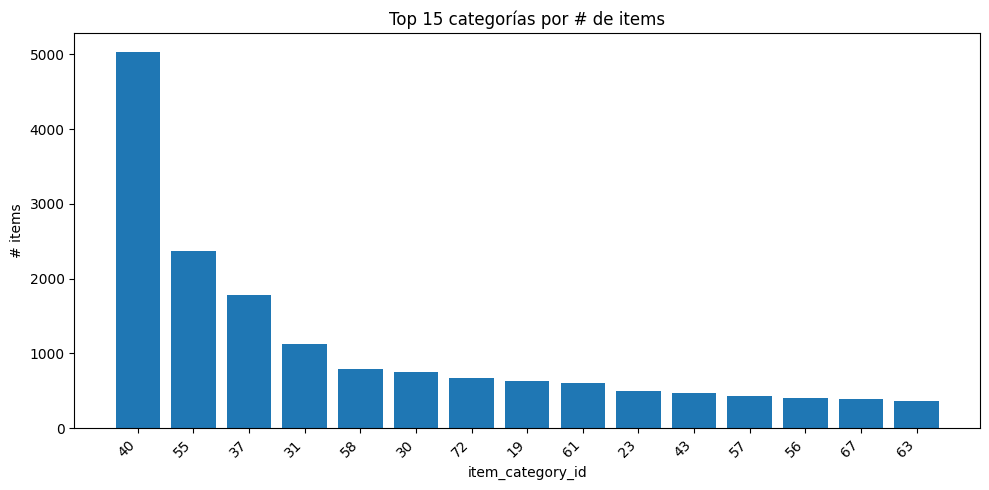

In [29]:

top = dfs["items.csv"][["item_id","item_category_id"]].groupby("item_category_id").count().sort_values(by="item_id",ascending=False).head(15)
top.reset_index(inplace=True)
plt.figure(figsize=(10,5))
plt.bar(top.item_category_id.astype(str), top.item_id)
plt.title("Top 15 categorías por # de items")
plt.xlabel("item_category_id")
plt.ylabel("# items")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [28]:
#plt.figure(figsize=(10,5))
#plt.bar(top.index.astype(str), top.values)
#plt.title("Top 15 categorías por # de items")
#plt.xlabel("item_category_id")
#plt.ylabel("# items")
#plt.xticks(rotation=45, ha="right")
#plt.tight_layout()
#plt.show()

In [ ]:
# Los 22,000 productos que se mencionan en el contexto, pero en realidad son 22,170
dfs["items.csv"].count()

item_name           22170
item_id             22170
item_category_id    22170
dtype: int64

In [ ]:
dfs["item_categories.csv"].head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [ ]:
dfs["shops.csv"].head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [ ]:
# Estas son el número de tiendas, de acuerdo con el contexto.
dfs["shops.csv"].count()

shop_name    60
shop_id      60
dtype: int64

In [ ]:
dfs["sample_submission.csv"].head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [ ]:
# es el número de productos por el npumero de tiendas
dfs["sample_submission.csv"].shape

(214200, 2)

In [15]:
# Not really.. Por que sería bueno revisar la distribución total? Seguro son las que tienen más volumen
60*22170

1330200

In [16]:
dfs["sample_submission.csv"]["item_cnt_month"].unique()

array([0.5])

In [17]:
# Tratando de enter los datos creo que no es necesaria la información de shops y de item categories
# Tampoco sirve sample submission es solo un ejemplo de como se tendría que ver el envio
# Vamos por la data 

train = dfs["sales_train.csv"]
train["date"] = pd.to_datetime(train["date"], format="%d.%m.%Y", errors="coerce")

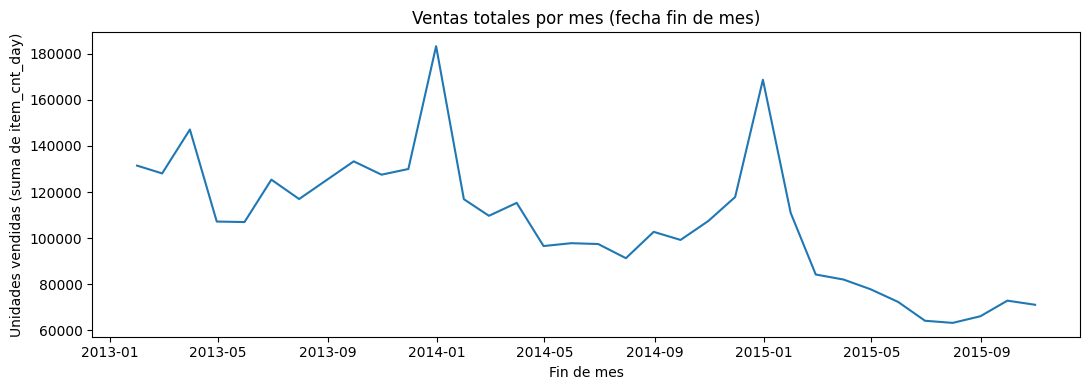

In [18]:
totals = (train.groupby("date_block_num", as_index=False)
          .agg(total_units=("item_cnt_day", "sum")))

totals = (train.groupby("date_block_num", as_index=False)
          .agg(total_units=("item_cnt_day", "sum"),
               max_date=("date", "max")))

totals["month_end"] = totals["max_date"] + pd.offsets.MonthEnd(0)

plt.figure(figsize=(11,4))
plt.plot(totals["month_end"], totals["total_units"])
plt.title("Ventas totales por mes (fecha fin de mes)")
plt.xlabel("Fin de mes")
plt.ylabel("Unidades vendidas (suma de item_cnt_day)")
plt.tight_layout()
plt.show()

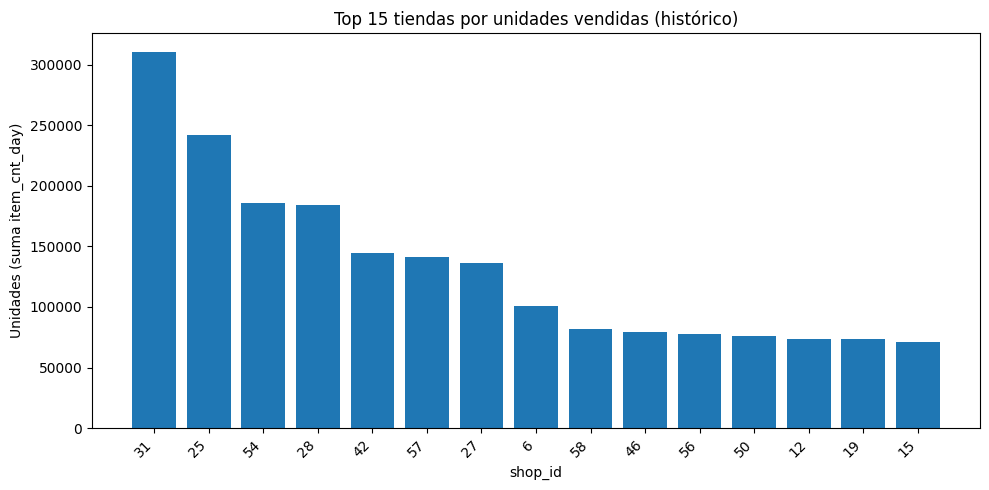

In [19]:
train = dfs["sales_train.csv"].copy()
train["date"] = pd.to_datetime(train["date"], format="%d.%m.%Y", errors="coerce")

shop_rank = (train.groupby("shop_id", as_index=False)
             .agg(total_units=("item_cnt_day","sum"))
             .sort_values("total_units", ascending=False)
             .head(15))

plt.figure(figsize=(10,5))
plt.bar(shop_rank["shop_id"].astype(str), shop_rank["total_units"])
plt.title("Top 15 tiendas por unidades vendidas (histórico)")
plt.xlabel("shop_id")
plt.ylabel("Unidades (suma item_cnt_day)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


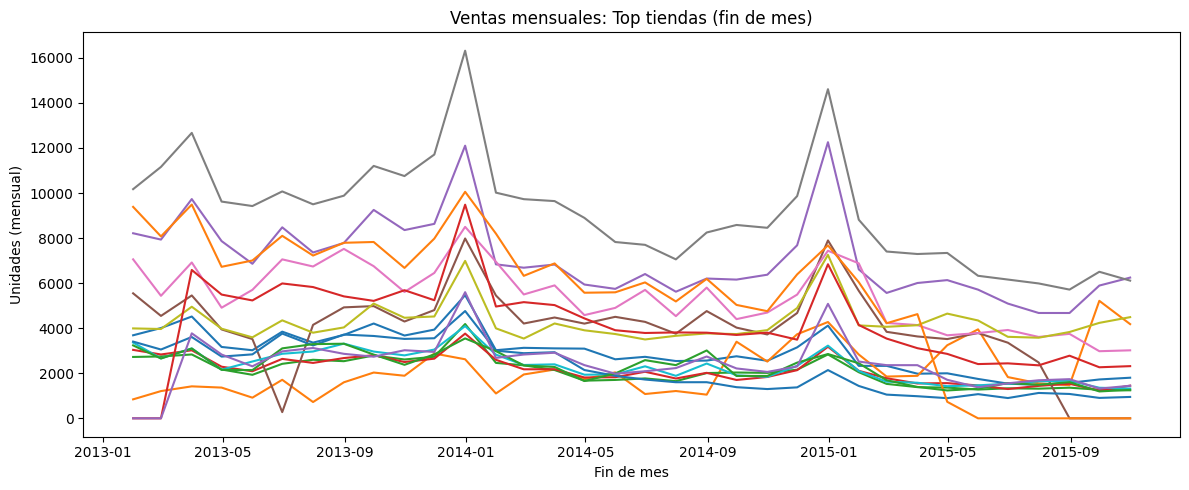

In [20]:
top_shops = shop_rank["shop_id"].tolist()

shop_month = (train[train["shop_id"].isin(top_shops)]
              .groupby(["date_block_num","shop_id"], as_index=False)
              .agg(units=("item_cnt_day","sum"),
                   max_date=("date","max")))

shop_month["month_end"] = shop_month["max_date"] + pd.offsets.MonthEnd(0)

pivot = (shop_month.pivot(index="month_end", columns="shop_id", values="units")
         .fillna(0)
         .sort_index())

plt.figure(figsize=(12,5))
plt.plot(pivot.index, pivot.values)
plt.title("Ventas mensuales: Top tiendas (fin de mes)")
plt.xlabel("Fin de mes")
plt.ylabel("Unidades (mensual)")
plt.tight_layout()
plt.show()

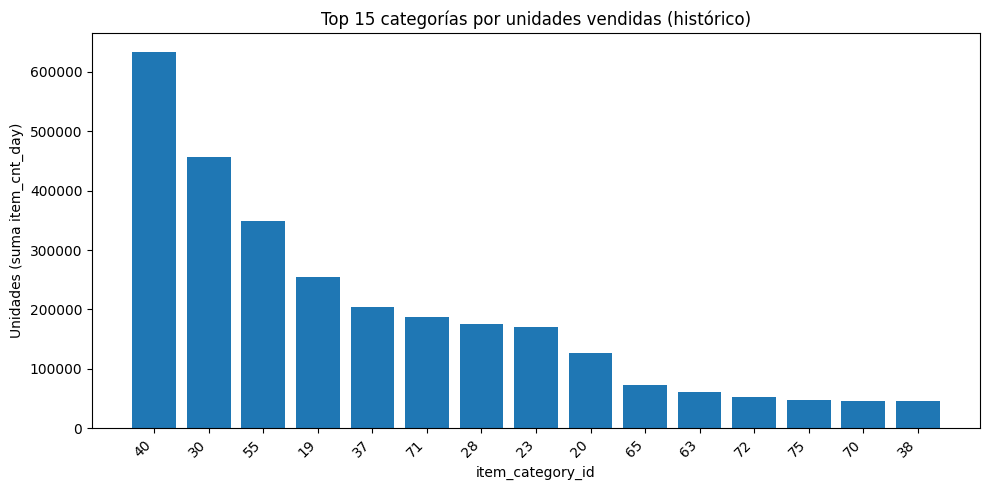

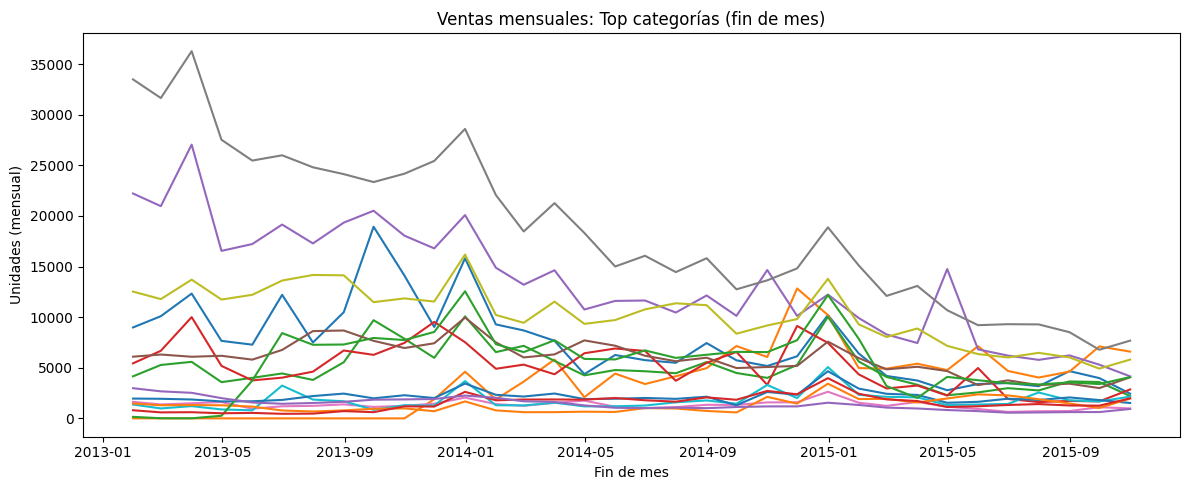

In [21]:
items = dfs["items.csv"][["item_id","item_category_id"]]
train_cat = train.merge(items, on="item_id", how="left")

cat_rank = (train_cat.groupby("item_category_id", as_index=False)
            .agg(total_units=("item_cnt_day","sum"))
            .sort_values("total_units", ascending=False)
            .head(15))

plt.figure(figsize=(10,5))
plt.bar(cat_rank["item_category_id"].astype(str), cat_rank["total_units"])
plt.title("Top 15 categorías por unidades vendidas (histórico)")
plt.xlabel("item_category_id")
plt.ylabel("Unidades (suma item_cnt_day)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

top_cats = cat_rank["item_category_id"].tolist()

cat_month = (train_cat[train_cat["item_category_id"].isin(top_cats)]
             .groupby(["date_block_num","item_category_id"], as_index=False)
             .agg(units=("item_cnt_day","sum"),
                  max_date=("date","max")))

cat_month["month_end"] = cat_month["max_date"] + pd.offsets.MonthEnd(0)

pivot_c = (cat_month.pivot(index="month_end", columns="item_category_id", values="units")
           .fillna(0)
           .sort_index())

plt.figure(figsize=(12,5))
plt.plot(pivot_c.index, pivot_c.values)
plt.title("Ventas mensuales: Top categorías (fin de mes)")
plt.xlabel("Fin de mes")
plt.ylabel("Unidades (mensual)")
plt.tight_layout()
plt.show()

In [22]:
# la tendencia de las categorías se ve mas a la baja que las tiendas eso habla de cambios en los hábitos de consumo ?

In [23]:
# En realidad el top historico de categorias va a la baja seá que se deben de renovar ciertos productos 

tc = train.merge(items, on="item_id", how="left")

cat_month = (tc.groupby(["date_block_num","item_category_id"], as_index=False)
             .agg(units=("item_cnt_day","sum")))

top_cats = (tc.groupby("item_category_id")["item_cnt_day"].sum()
            .sort_values(ascending=False).head(15).index)

top_share = (cat_month.assign(is_top=cat_month["item_category_id"].isin(top_cats))
             .groupby(["date_block_num","is_top"], as_index=False)["units"].sum()
             .pivot(index="date_block_num", columns="is_top", values="units")
             .fillna(0))
top_share["share_top15"] = top_share[True] / (top_share[True] + top_share[False])
top_share[["share_top15"]]


is_top,share_top15
date_block_num,
0,0.785236
1,0.793263
2,0.815838
3,0.808210
4,0.805712
5,0.825723
6,0.820957
7,0.837842
8,0.849091


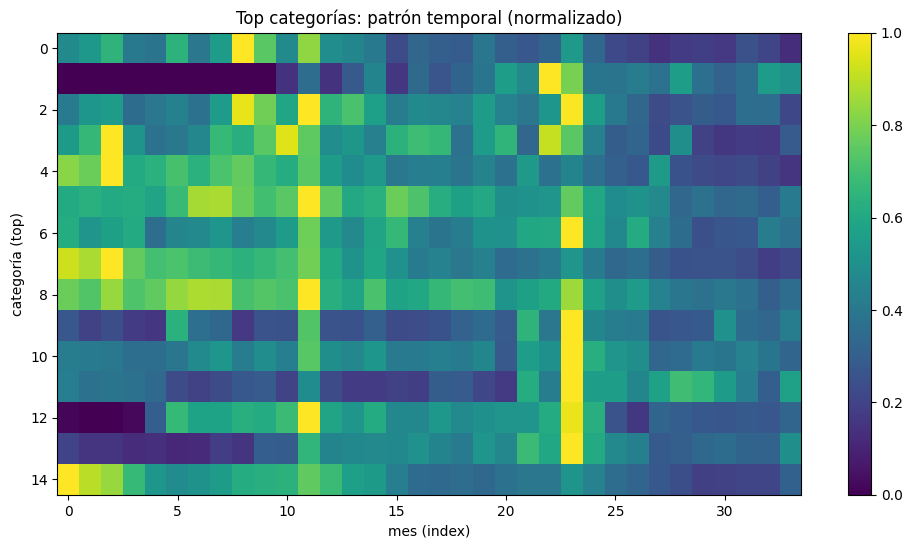

In [24]:
heat = pivot_c.copy()
heat = heat / heat.max(axis=0).replace(0, pd.NA)

plt.figure(figsize=(12,6))
plt.imshow(heat.T, aspect="auto", interpolation="nearest")
plt.title("Top categorías: patrón temporal (normalizado)")
plt.xlabel("mes (index)")
plt.ylabel("categoría (top)")
plt.colorbar()
plt.show()

In [25]:
# Podemos concluir las categorias top han disminuido y también que definitivamente hay estacionalidades en los datos.

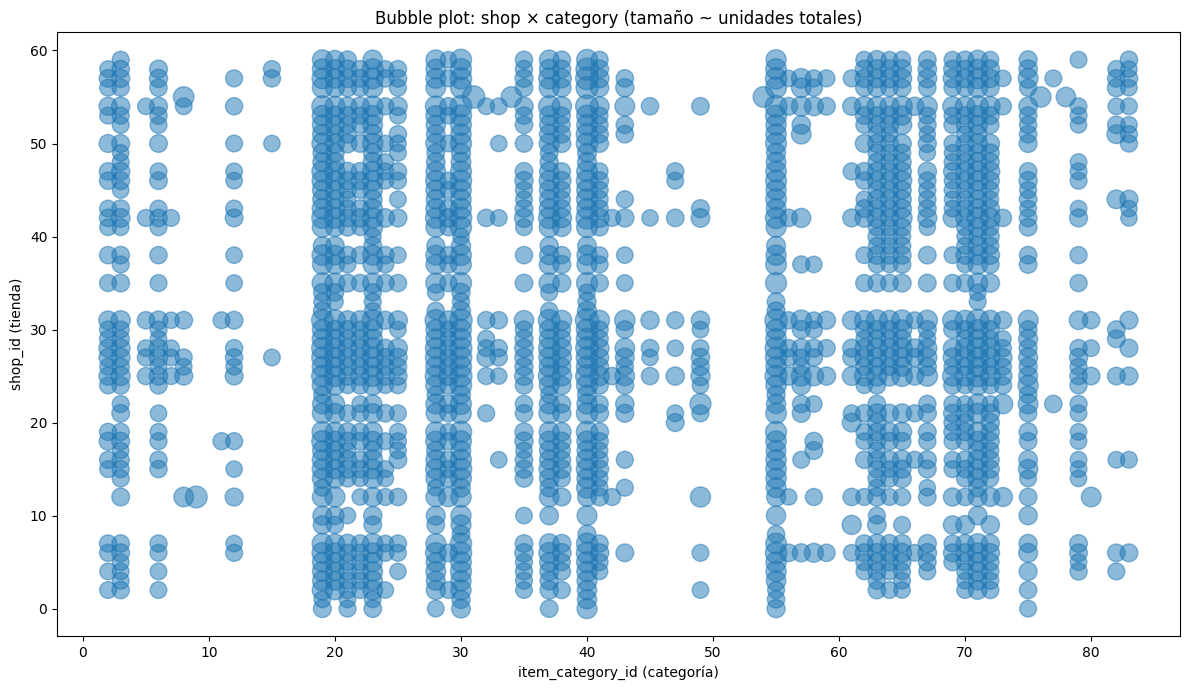

In [26]:

sc = (tc.groupby(["shop_id","item_category_id"], as_index=False)
      .agg(units=("item_cnt_day","sum")))

sc = sc.sort_values("units", ascending=False).head(1500)

sizes = np.log1p(sc["units"]) * 25  

plt.figure(figsize=(12,7))
plt.scatter(sc["item_category_id"], sc["shop_id"], s=sizes, alpha=0.5)
plt.title("Bubble plot: shop × category (tamaño ~ unidades totales)")
plt.xlabel("item_category_id (categoría)")
plt.ylabel("shop_id (tienda)")
plt.tight_layout()
plt.show()


In [27]:
#Hay productos que se venden solo en ciertas tiendas y otros que son mas universales